In [1]:
ls

142629 - 1_11_iq-Copy1.jpg  __pycache__/         logs/
143652 - 1 -ground.jpg      data/                low_threshold
143652 - 1.jpg              data2/               second_try.h5
BinaryClassTraining.py      data3/               simple_detection.py
README.md                   data4/               simple_obj_det.py
Untitled.ipynb              egg_detection.ipynb
Untitled1.ipynb             fiveEpochs.h5


In [2]:
from keras.models import load_model
model = load_model('fiveEpochs.h5')

Using TensorFlow backend.


<IPython.core.display.Javascript object>


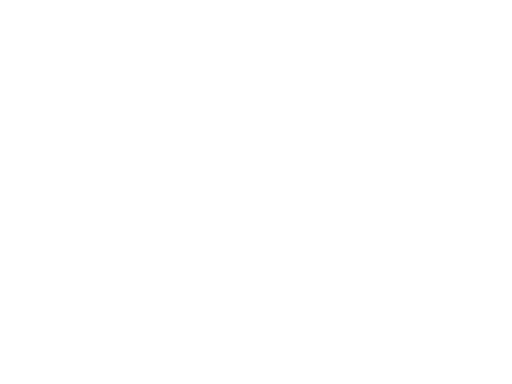

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 29, 29, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 12, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          18496     
__________

'binary_crossentropy'

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
I = cv2.imread('/root/eggtesting/data4/train/withEggs/145516 - 2_25_iq.jpg')
I1 = I/255.0
imgplot = plt.imshow(I1)
plt.title('Egg that is expected to detect as positive')
IArray = np.expand_dims(I1,axis=0)
model.predict(IArray)
print(model.summary())
model.loss



array([[0.9208347]], dtype=float32)

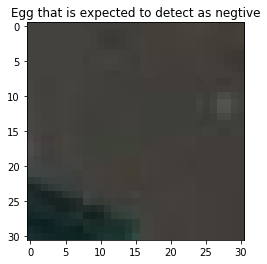

In [4]:
I2 = cv2.imread('/root/eggtesting/data4/train/withoutEggs/145516 - 2_25_iq.jpg')
I2 = I2/255.0
imgplot = plt.imshow(I2)
plt.title('Egg that is expected to detect as negtive')
IArray = np.expand_dims(I2,axis=0)
model.predict(IArray)

In [5]:
# Now try adding to a tensor and detecting on a tensor
INewArray = np.stack([I1,I2])
print(INewArray)
model.predict(INewArray)

[[[[0.18431373 0.2        0.17647059]
   [0.21960784 0.23529412 0.21176471]
   [0.25098039 0.25490196 0.23921569]
   ...
   [0.30980392 0.29803922 0.27843137]
   [0.28235294 0.29019608 0.26666667]
   [0.25490196 0.27058824 0.24705882]]

  [[0.20392157 0.21960784 0.19607843]
   [0.21568627 0.23137255 0.20784314]
   [0.22352941 0.22745098 0.21176471]
   ...
   [0.30196078 0.29019608 0.27058824]
   [0.27843137 0.27843137 0.25490196]
   [0.24705882 0.2627451  0.23921569]]

  [[0.23921569 0.26666667 0.23921569]
   [0.23529412 0.2627451  0.23529412]
   [0.22745098 0.24313725 0.22352941]
   ...
   [0.29411765 0.27843137 0.25882353]
   [0.27058824 0.27058824 0.24705882]
   [0.24705882 0.25490196 0.23137255]]

  ...

  [[0.15686275 0.21176471 0.20392157]
   [0.14509804 0.2        0.19215686]
   [0.14117647 0.19607843 0.18039216]
   ...
   [0.16078431 0.19607843 0.18431373]
   [0.15294118 0.18823529 0.17647059]
   [0.14901961 0.18431373 0.17254902]]

  [[0.16470588 0.23137255 0.21960784]
   [0.1

array([[0.00610587],
       [0.9208346 ]], dtype=float32)

(31, 31, 3)

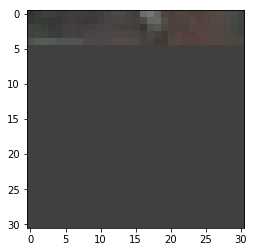

In [6]:
# try nieve approach
I3 = I1
I3[5:,:]=np.mean(I1)
plt.imshow(I3)
I3.shape

In [7]:
INewArray = np.stack([I1,I2,I3])

In [8]:
model.predict(INewArray)


array([[0.9984976],
       [0.9208347],
       [0.9984976]], dtype=float32)

In [9]:
model.predict_proba(INewArray)


array([[0.9984976],
       [0.9208347],
       [0.9984976]], dtype=float32)

[689 962   3]
[682. 961.   0.]


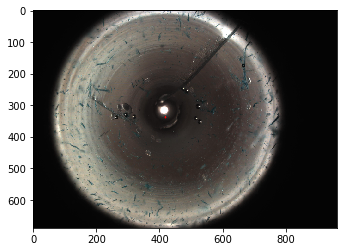

In [10]:
testImage = cv2.imread('143652 - 1.jpg')/255
testImage = cv2.resize(testImage,(0,0),fx = 0.25,fy = 0.25)
plt.imshow(testImage)
testImage = np.array(testImage)
testImageSize = np.array(testImage.shape)
print(testImageSize)

trainImageSize = 31
clippedTestImageSize = np.floor(testImageSize/trainImageSize)*trainImageSize
print(clippedTestImageSize)
idx = clippedTestImageSize.astype("int")
my = idx[0]
mx = idx[1]


(689, 962, 3)


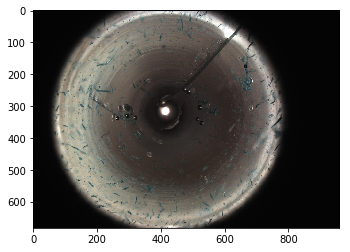

In [11]:
print(testImage.shape)
testImage2 = testImage[0:my,0:mx,:]
plt.imshow(testImage2)

In [12]:
tileArrayDimensions = (clippedTestImageSize/trainImageSize).astype("int")
nTilesV = tileArrayDimensions[0]
nTilesH = tileArrayDimensions[1]

detectedRegions = np.zeros((nTilesV,nTilesH))
print(detectedRegions.shape)

# Try reshaping into one long tile
# longStrip = np.reshape(testImage2,[trainImageSize,nTilesH*nTilesV*trainImageSize,3])


for i in range(0,nTilesV):
    for j in range(0,nTilesH):
        yMin = i*trainImageSize
        yMax = (i+1)*trainImageSize
        xMin = j*trainImageSize
        xMax = (j+1)*trainImageSize
        testImageC = testImage2[yMin:yMax,xMin:xMax,:]
        #print(testImageC.shape)
        testImageD = np.expand_dims(testImageC,axis=0)
        #print(testImageD.shape)
        detectedRegions[i,j] = model.predict(testImageD)
    
    
    

(22, 31)


9.0
(22, 31)


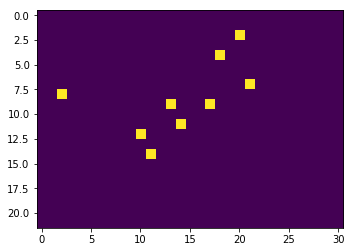

In [13]:
threshold = 0.1
detectedCellArray = (detectedRegions<threshold)/1.0
plt.imshow(detectedCellArray)
print(np.sum(detectedCellArray[:]))
detected_array_shape = detectedCellArray.shape
print(detected_array_shape)

        

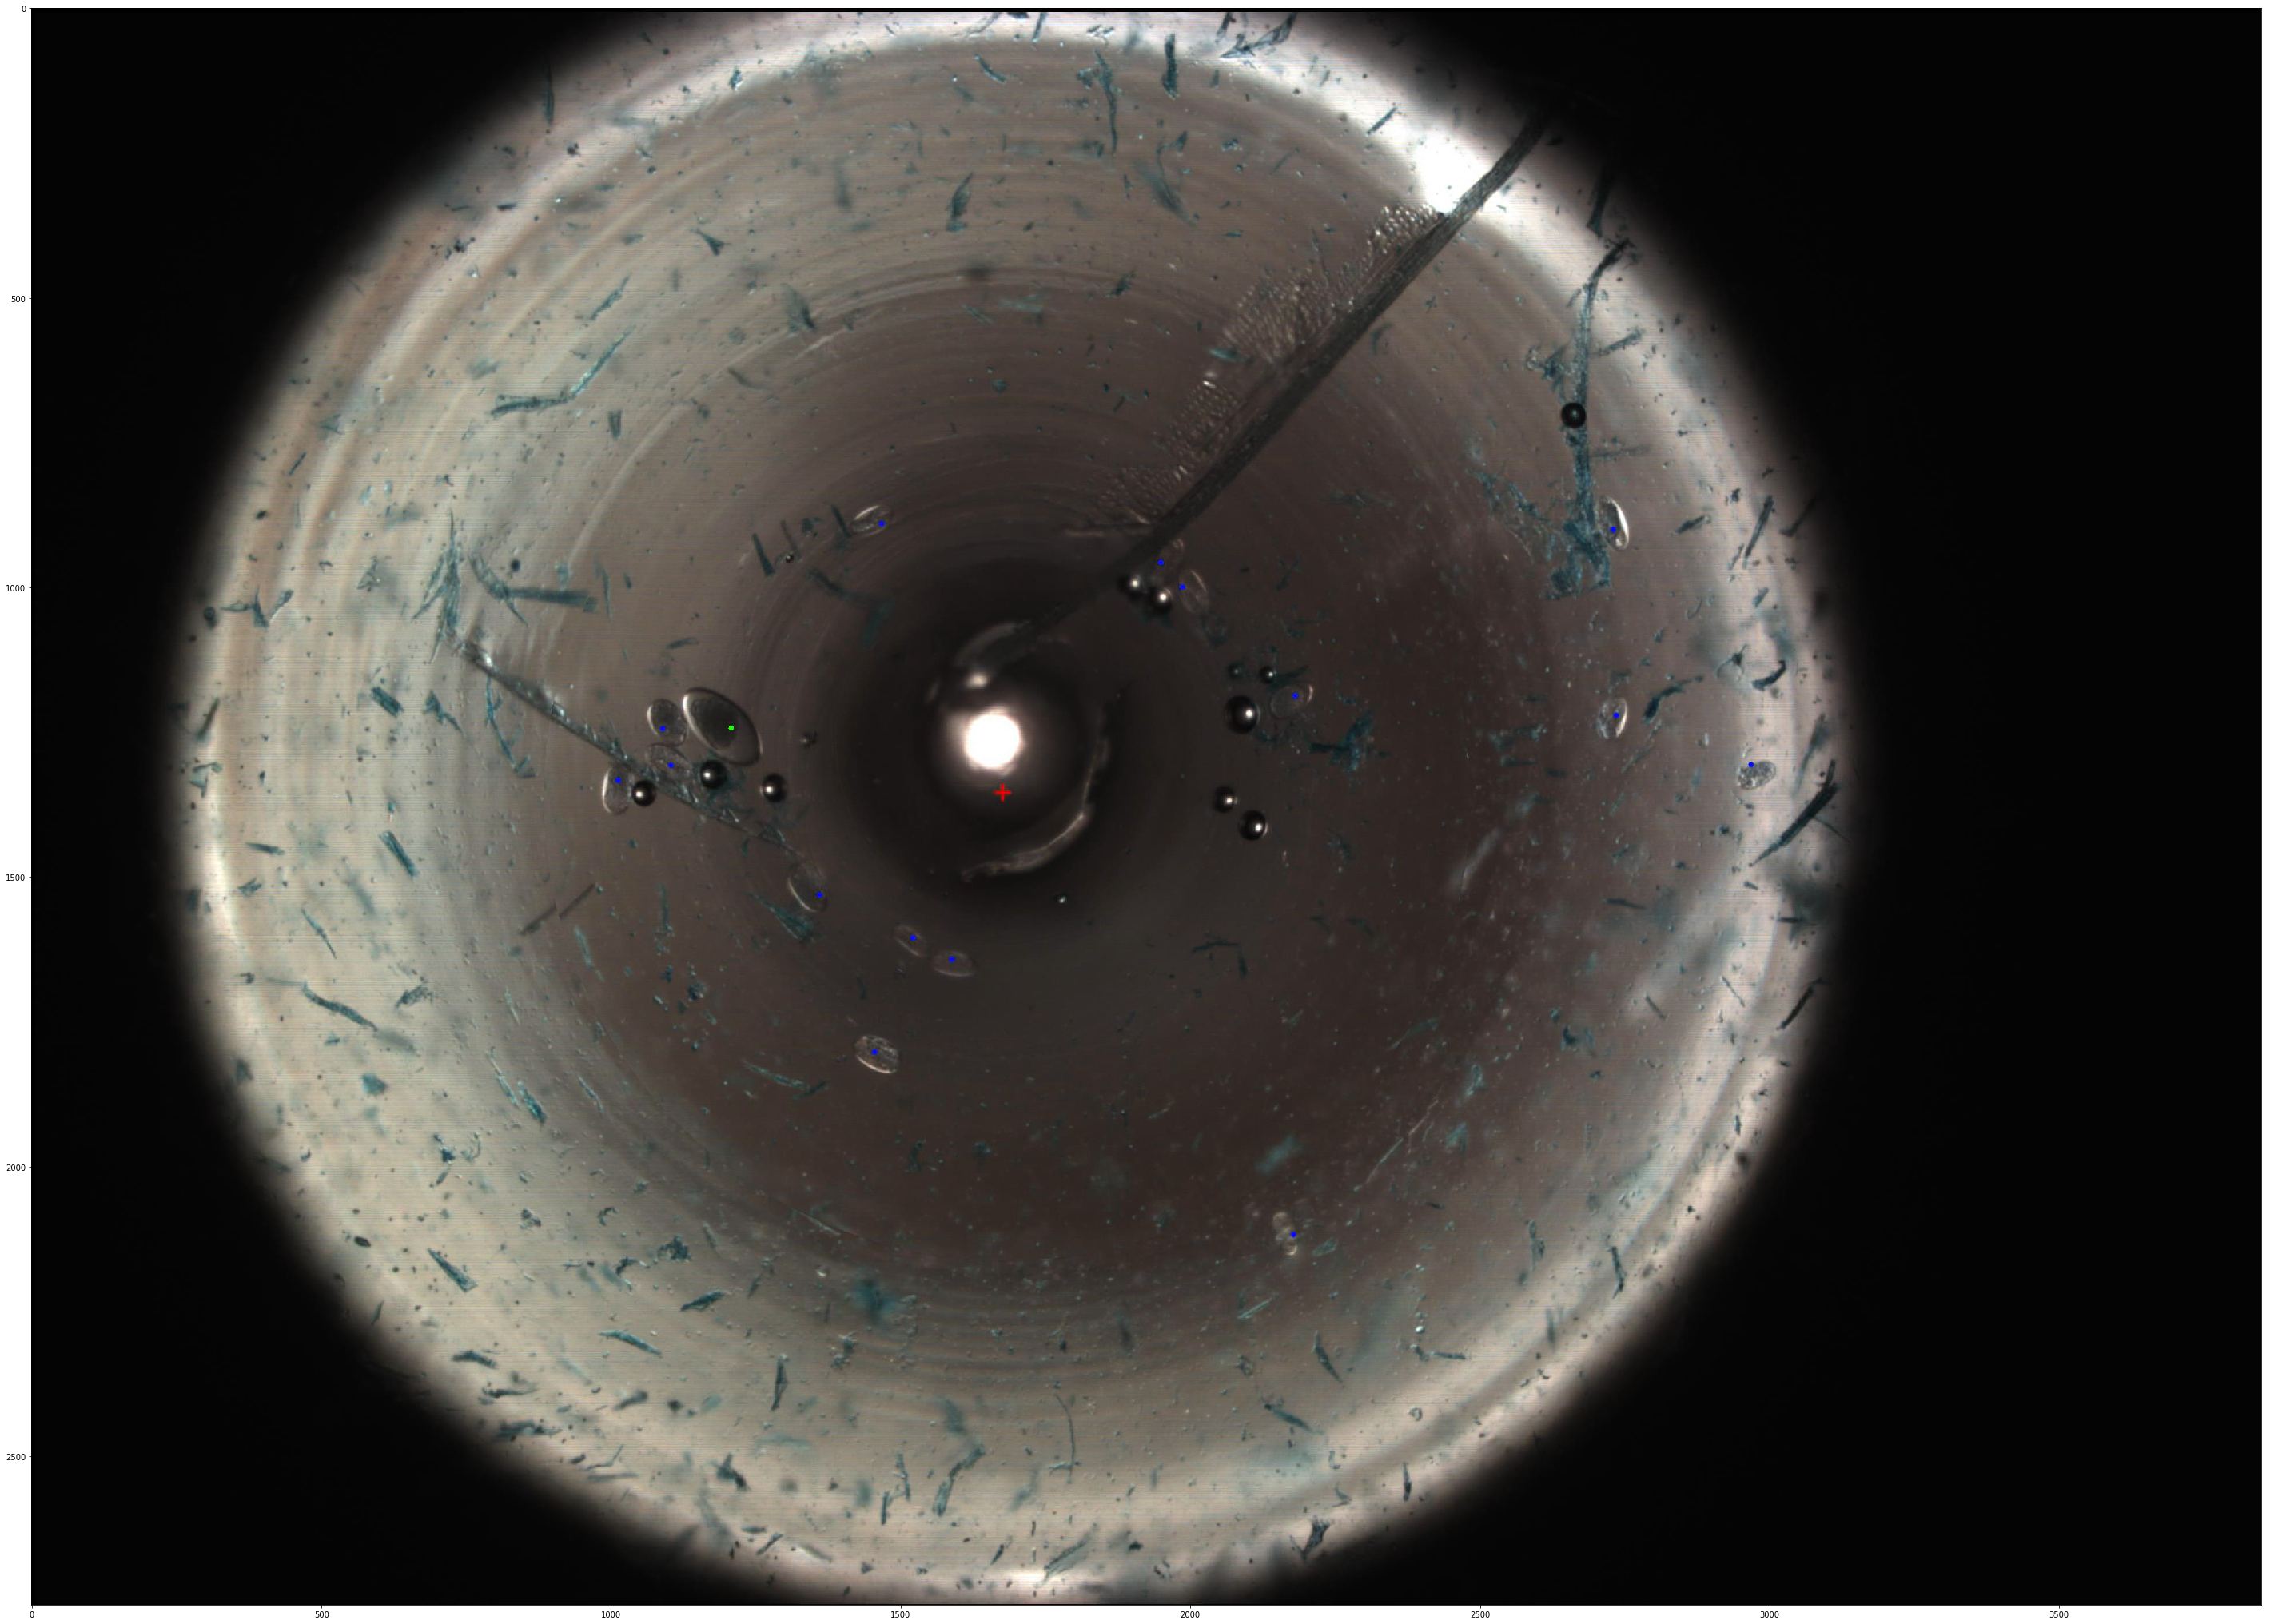

In [14]:
ground_truth_image = cv2.imread('/root/eggtesting/143652 - 1 -ground.jpg')
ground_truth_image = ground_truth_image/255.0
plt.rcParams["figure.figsize"]=50,50
imgplot = plt.imshow(ground_truth_image)


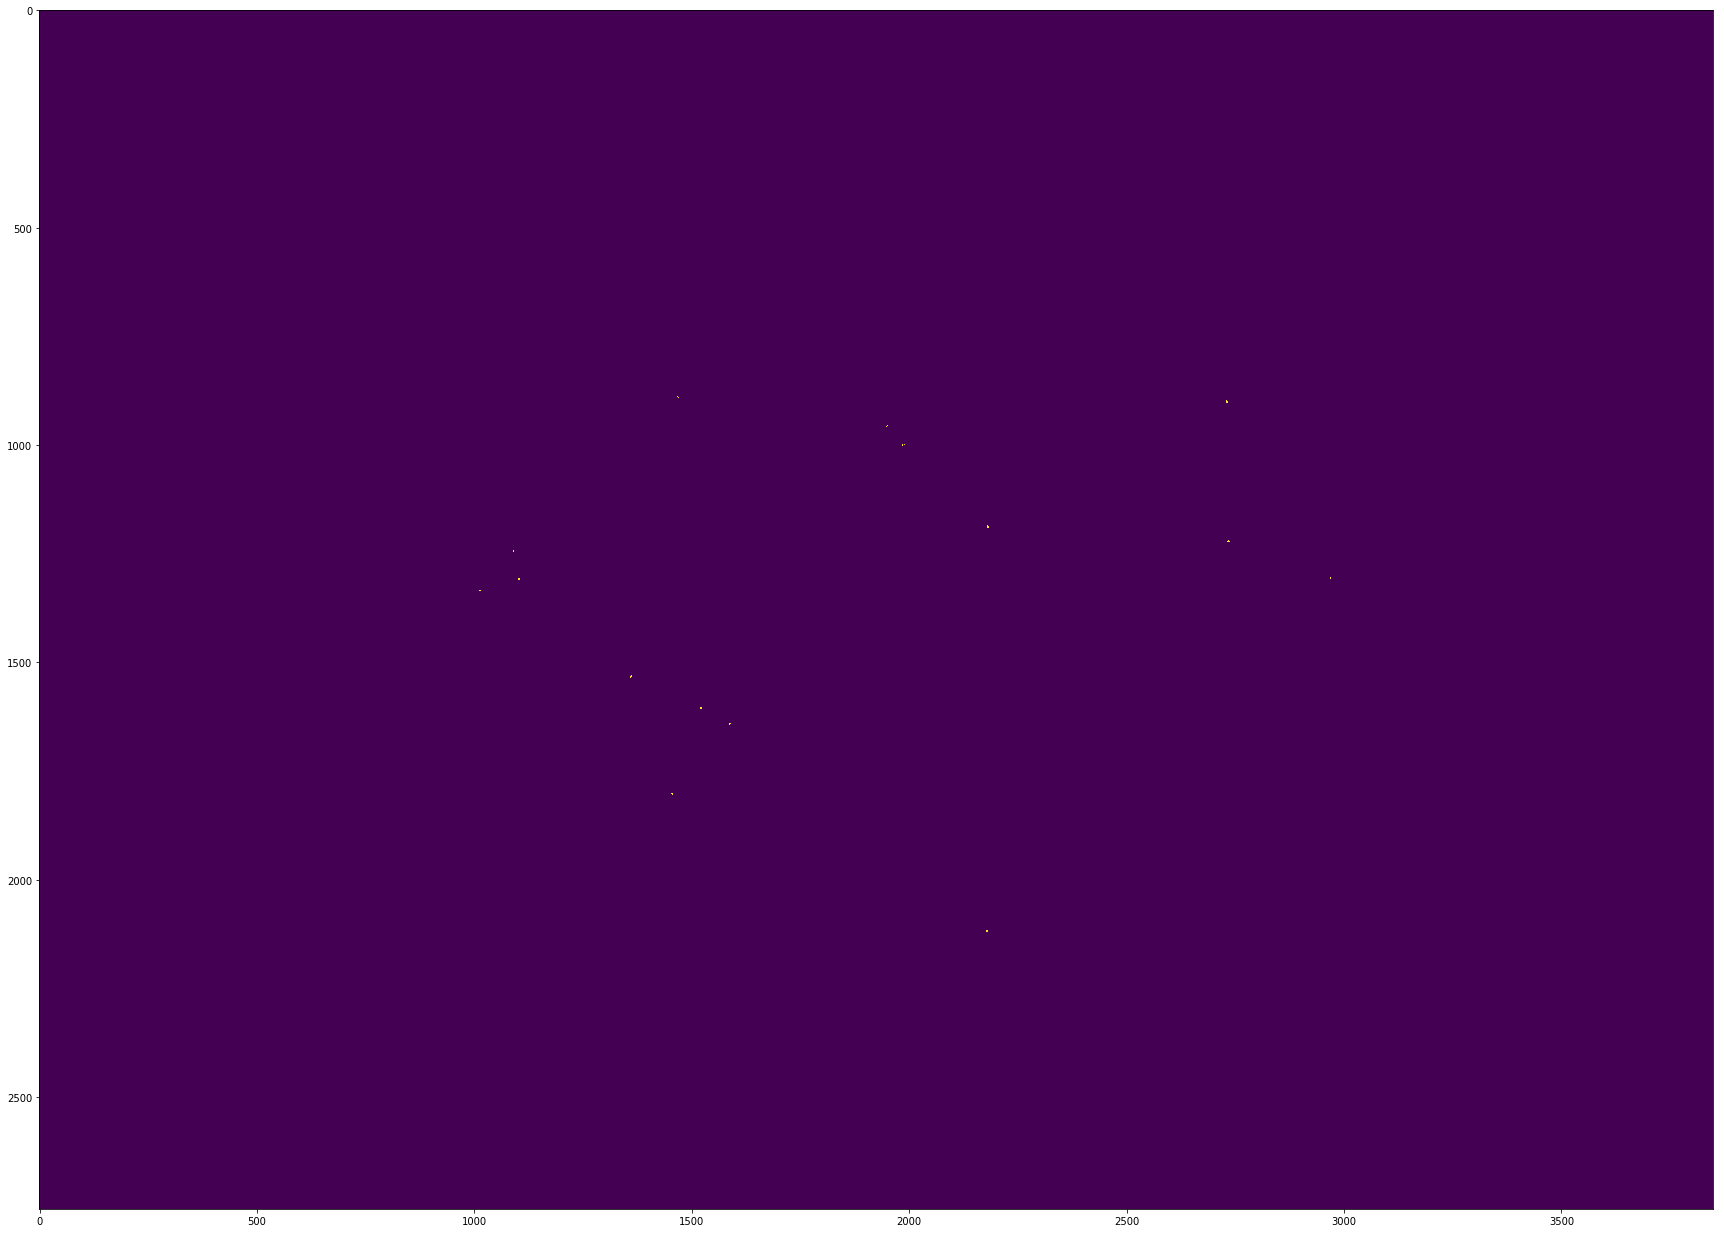

In [15]:
ground_truth_image.shape
high_threshold = 0.95;
low_threshold = 0.05;
high_condition = ground_truth_image[:,:,2]>threshold;
low_condition = ~((ground_truth_image[:,:,0] > low_threshold) | (ground_truth_image[:,:,1] > low_threshold))
red_dots_only = (high_condition & low_condition)
plt.rcParams["figure.figsize"]=30,30
fig = plt.imshow(red_dots_only)

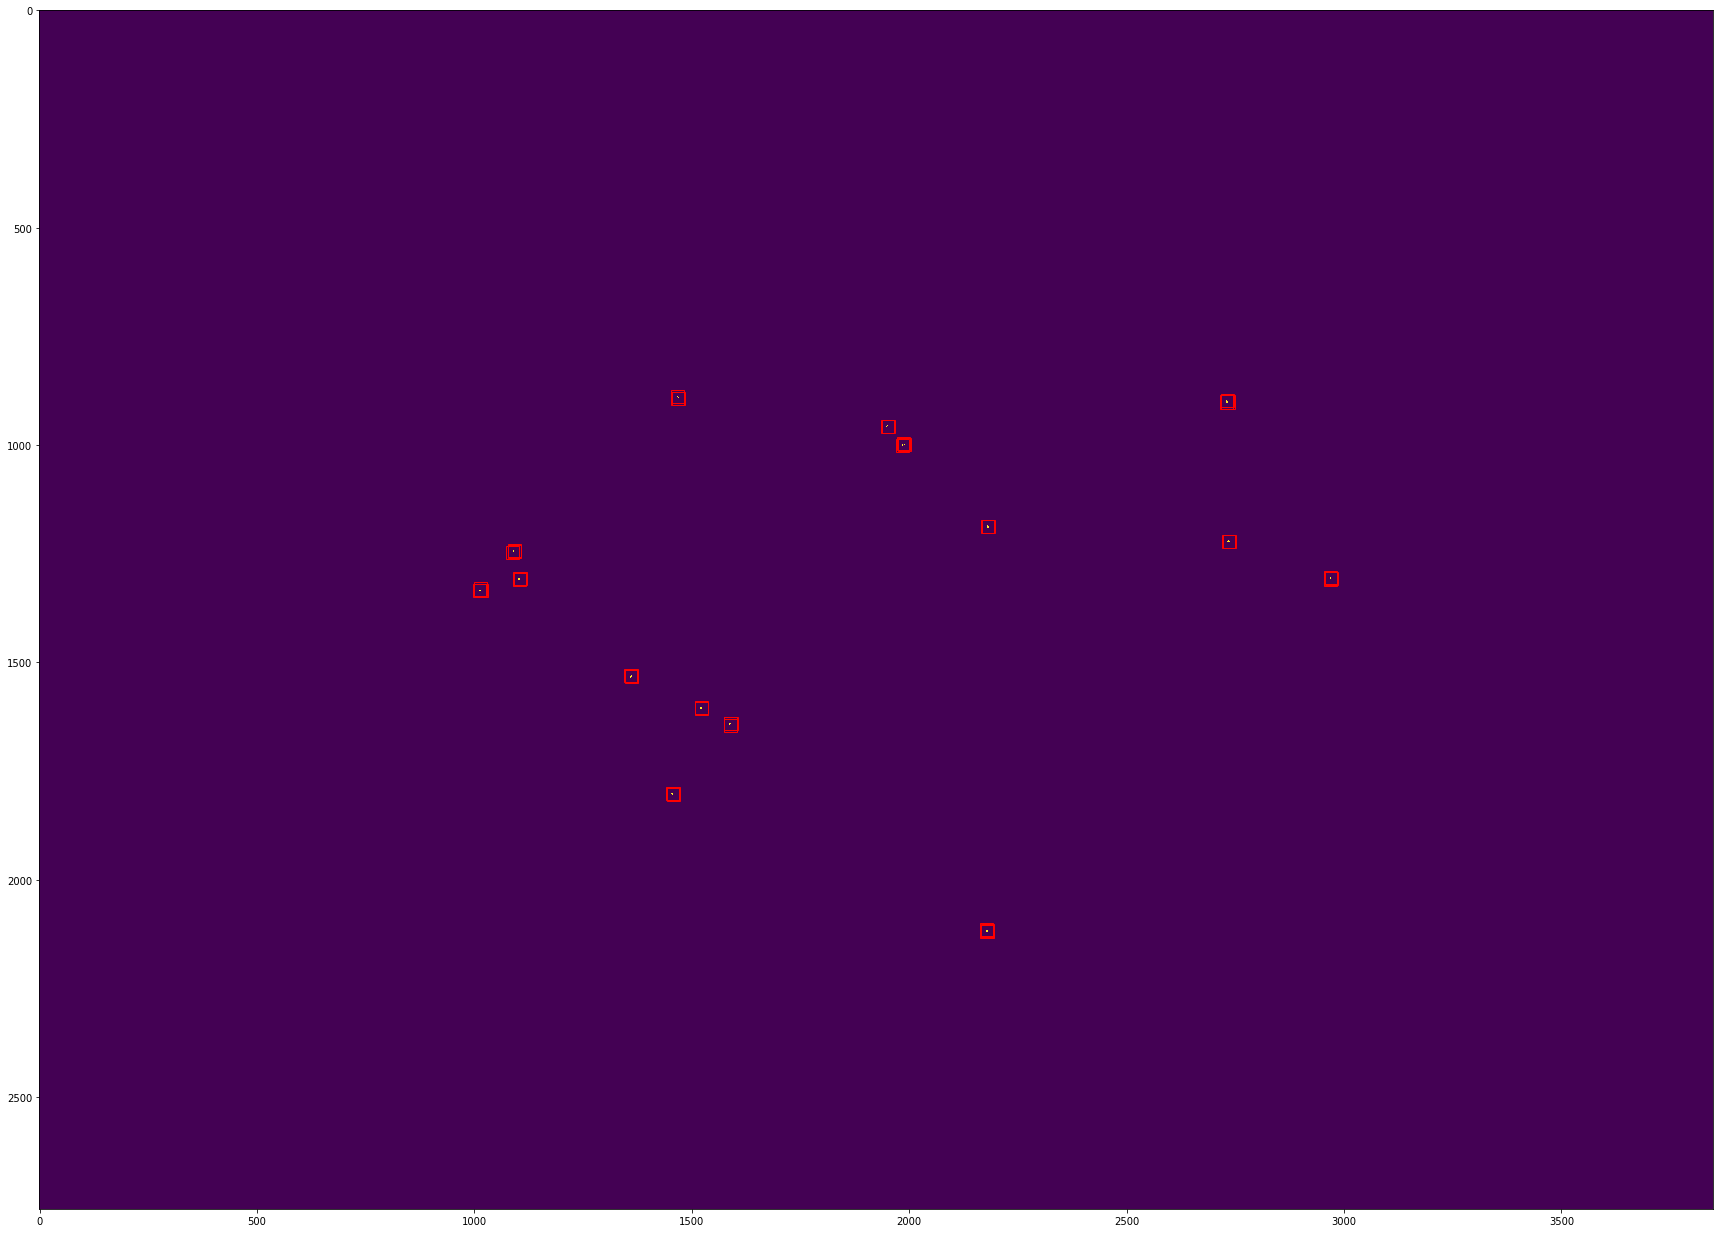

In [16]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

blobs_log = blob_log(red_dots_only, max_sigma=30, num_sigma=10, threshold=.1)

plt.rcParams["figure.figsize"]=30,30

fig = plt.imshow(red_dots_only)
ax = plt.gca()
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

deltaX = 30
deltaY = 30

for blob in blobs_log:
    rect = rect = patches.Rectangle((blob[1]-15,blob[0]-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [17]:
pixels_per_cell = np.floor(np.array(red_dots_only.shape)/np.array(detected_array_shape)).astype("int")
expected_array = np.zeros(detected_array_shape)
for i in range(detected_array_shape[0]):
    for j in range(detected_array_shape[1]):
        #print("LHS" + np.str(LHS*pixels_per_cell[0]) + "Top" + np.str(Top*pixels_per_cell[1]))        
        for blob in blobs_log:
            x_cond = i*pixels_per_cell[0]<=blob[0]<(i+1)*pixels_per_cell[0]
            y_cond = j*pixels_per_cell[1]<=blob[1]<(j+1)*pixels_per_cell[1]
            if x_cond & y_cond:
                expected_array[i,j] = expected_array[i,j] = 1                                


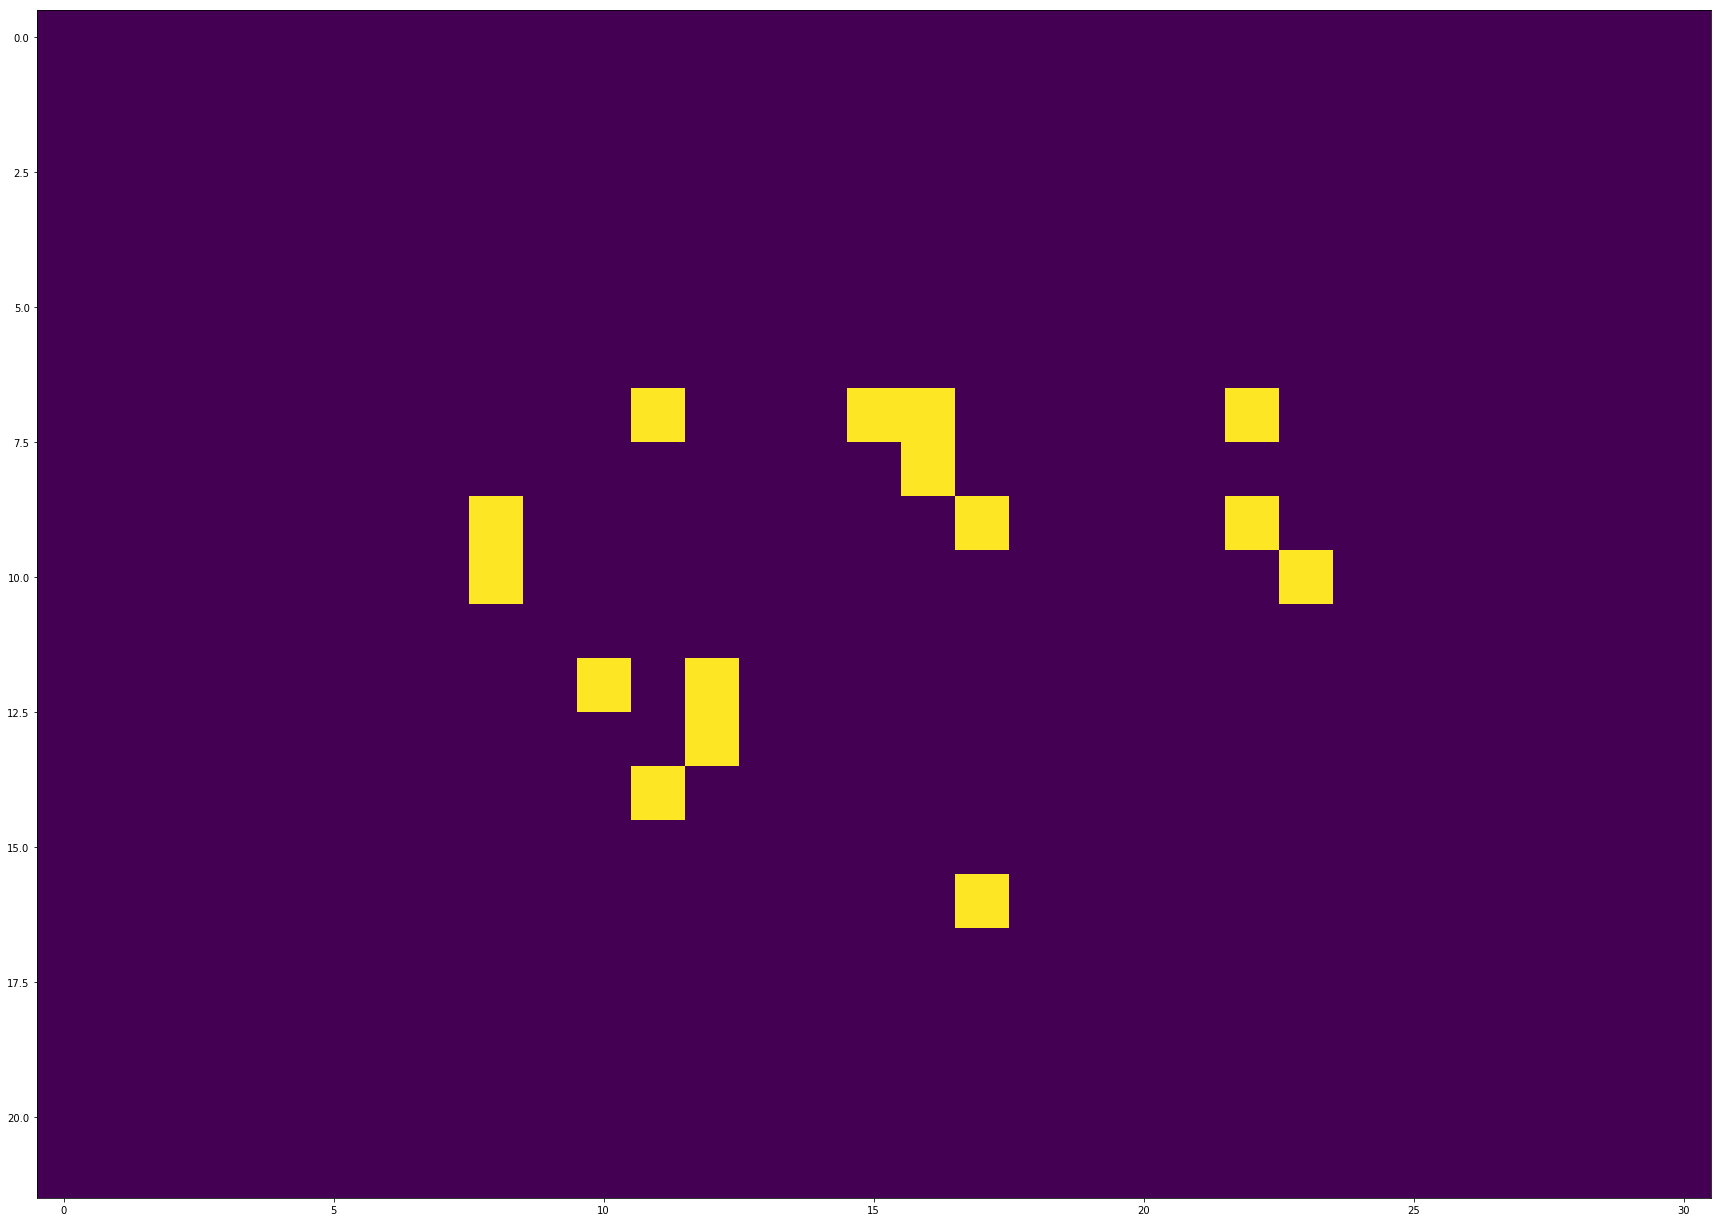

In [18]:
plt.imshow(expected_array)   


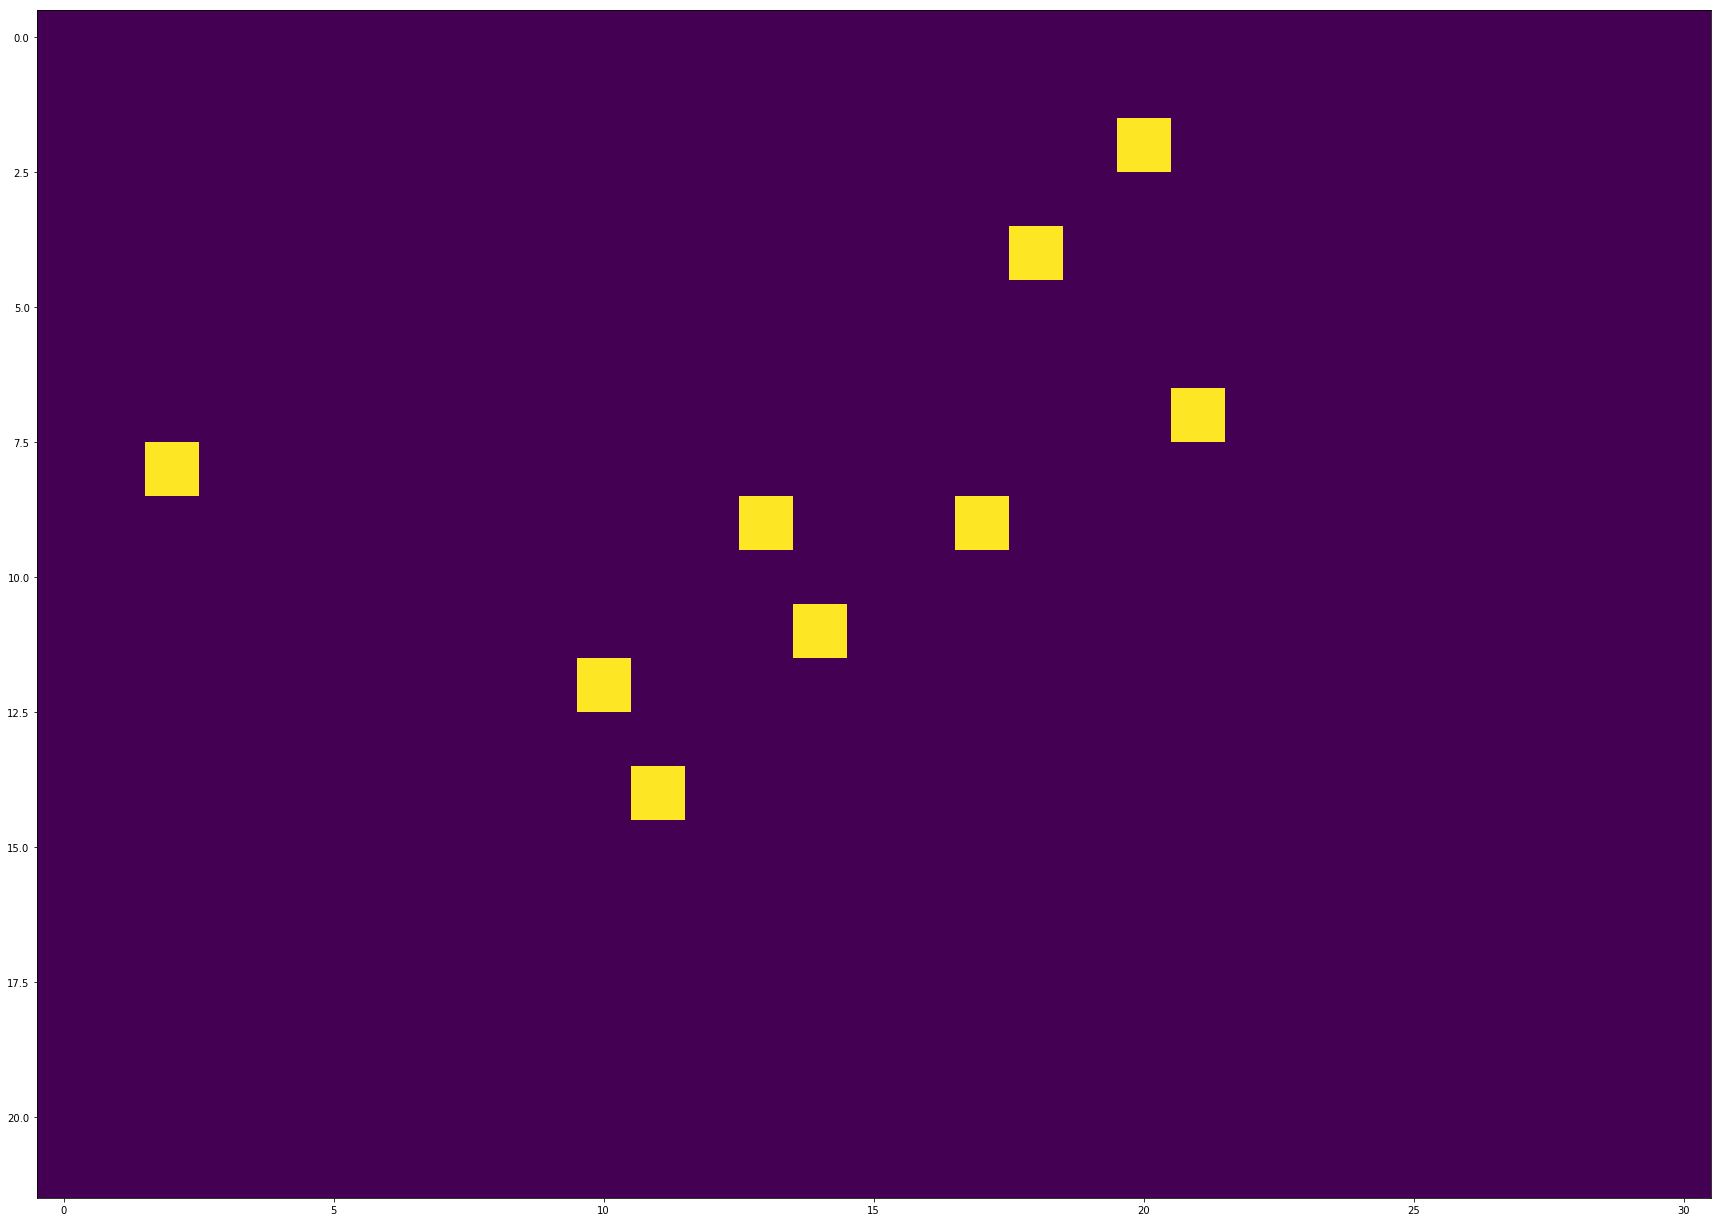

In [19]:
plt.imshow(detectedCellArray.astype("int"))

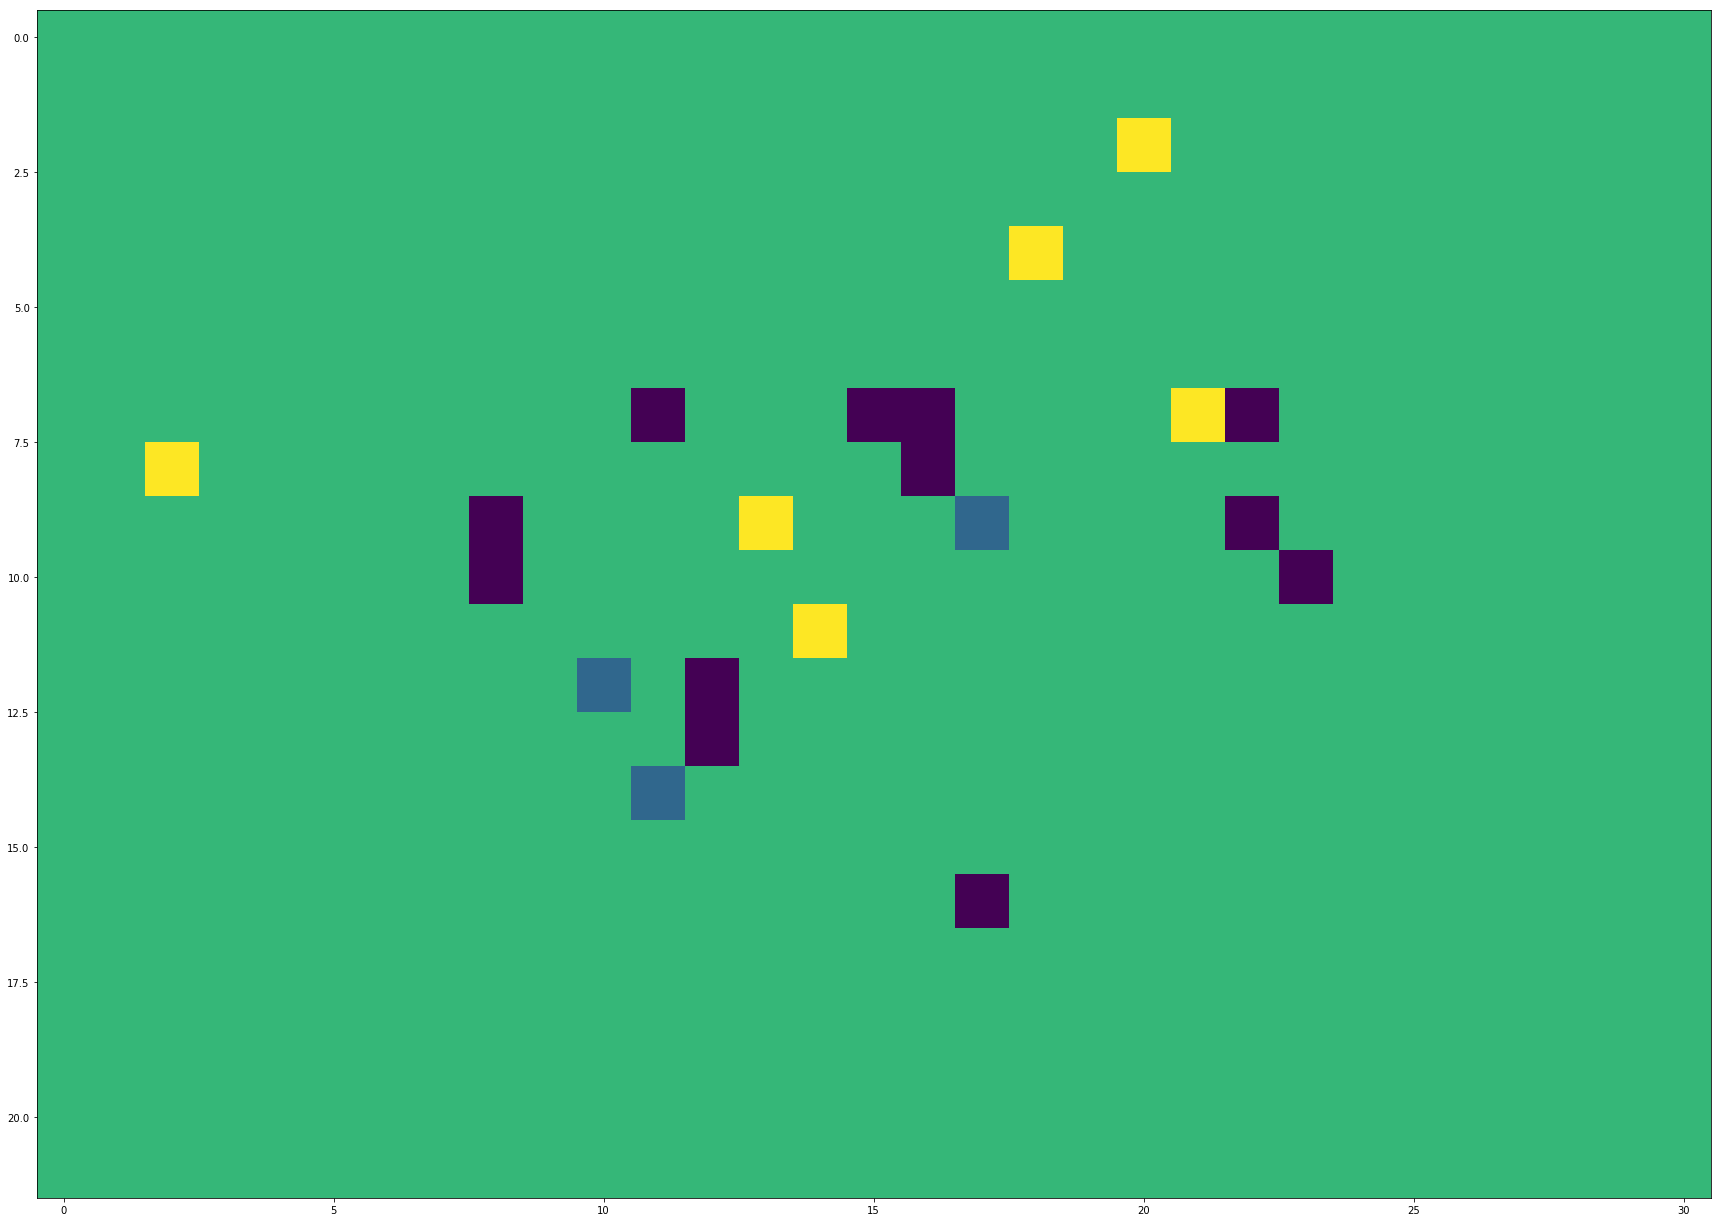

In [20]:
plt.imshow((1 + detectedCellArray - 2*expected_array)/2)

In [21]:
!git add egg_detection.*
!git commit -m "Working to detected end point"

[master 22791bf] Working to detected end point
 1 file changed, 71 insertions(+), 14 deletions(-)
